In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
results = pd.read_csv('data/test.csv')
# results = pd.read_csv('data/results-new.csv')
opt_results = pd.read_csv('data/results-opt.csv')

algs = results.columns[5:]

results

,row_id,noise_distribution,slope,m,k,all,partition,random_1,random_(10*km),random_1000,opt
0,7b7879e9-be85-4e9e-b51e-619a6220eb25,"uniform(-2,2)",1,3,5,-0.507045,-0.101840,-0.416129,0.010635,0.010635,0.010635
1,d639d981-2328-41d8-afd3-8d5922bb0f25,"uniform(-2,2)",1,3,100,0.023594,-0.003956,-0.076222,0.000471,0.002985,NaN
2,c47347ec-7bad-4390-bbec-eea6909b7ee1,"normal(0,.5^2)",1,3,5,0.107956,0.154588,-0.630696,-0.000211,-0.000211,-0.000211
3,991b79c3-e4c8-4a6f-832a-c7318f8381e7,"normal(0,.5^2)",1,3,100,-0.012895,0.001105,0.101219,-0.000080,0.000674,NaN
4,b8b2d68c-c034-4ef2-9af2-d93daaa5bad2,beta(2-2)-mirrored,1,3,5,0.108580,0.079105,0.086055,-0.003020,-0.003020,-0.003020
5,f9e25025-e111-4f73-8689-6556cdec9bc2,beta(2-2)-mirrored,1,3,100,-0.028536,-0.002372,-0.170432,-0.000158,-0.000218,NaN
6,7e9dface-0012-4078-8737-d41dbc892be7,power-law(2)-mirrored,1,3,5,0.102620,0.020635,0.397346,-0.008106,-0.005472,-0.005472
7,82b72a24-af2a-4bb0-b431-439f1b18fce1,power-law(2)-mirrored,1,3,100,0.018402,-0.011330,-0.000861,0.000058,0.000362,NaN


In [21]:
def mean_abs(series):
    return series.abs().mean()

def mean_square(series):
    return series.pow(2).mean()


groups_rest = results.groupby(['noise_distribution', 'slope', 'm', 'k'])
groups_opt = opt_results.groupby(['noise_distribution', 'slope', 'm', 'k'])

mean_abs_rest = groups_rest.agg(mean_abs).reset_index()
mean_square_rest = groups_rest.agg(mean_square).reset_index()
mean_abs_opt = groups_opt.agg(mean_abs).reset_index()
mean_square_opt = groups_opt.agg(mean_square).reset_index()

In [9]:
def plot_data(square, noise_dist_index, slope, m, plot_algs, disp_opt):

    if square:
        rest_data = mean_square_rest
        opt_data = mean_square_opt
    else:
        rest_data = mean_abs_rest
        opt_data = mean_abs_opt

    noise_dist = rest_data.noise_distribution.unique()[noise_dist_index]
    print(noise_dist)


    rest_data_filtered = rest_data[(rest_data.noise_distribution == noise_dist)
                                & (rest_data.slope == slope)
                                & (rest_data.m == m)]


    x_vals = [str(i) for i in rest_data.k.unique()]
    for alg in plot_algs:
        y_vals = rest_data_filtered[alg]
        plt.plot(x_vals, y_vals, label = alg)

    if disp_opt:
        opt_data_filtered = opt_data[(opt_data.noise_distribution == noise_dist)
                                    & (opt_data.slope == slope)
                                    & (opt_data.m == m)]
        opt_vals = opt_data_filtered.opt
        plt.plot(x_vals[:len(opt_vals)], opt_vals, label = 'opt')

    plt.yscale('log')
    plt.legend(loc="upper right")
    plt.show()

normal(0,.5^2)


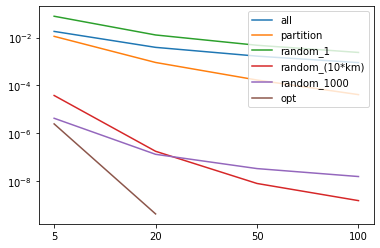

In [19]:
square = True
noise_dist_index = 1
slope = 5
m = 3
plot_algs = algs
disp_opt = True

plot_data(square, noise_dist_index, slope, m, plot_algs, disp_opt)
